## Read text data

In [12]:
import pandas as pd
pd.set_option('display.max_colwidth', 100)
data = pd.read_csv("news.csv")#, sep='\t')
data.columns = ['ID','title','text','label']
data.head()

,ID,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focu...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO),Google Pinterest Digg Linkedin Reddit Stumbleupon Print Delicious Pocket Tumblr \nThere are two ...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,"U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, am...",REAL
3,10142,Bernie supporters on Twitter erupt in anger against the DNC: 'We tried to warn you!',"— Kaydee King (@KaydeeKing) November 9, 2016 The lesson from tonight's Dem losses: Time for Demo...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners Hillary Clinton and Donald Trump are leading in t...,REAL


## Clean text data by removing punctuation, tokenize, removing stopwords, and stem

In [8]:
import re
import string
import nltk

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text
data['cleaned_text'] = data['text'].apply(lambda x: clean_text(x))

data.head()

,Unnamed: 0,title,text,label,cleaned_text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focu...",FAKE,"[daniel, greenfield, shillman, journal, fellow, freedom, center, new, york, writer, focus, radic..."
1,10294,Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO),Google Pinterest Digg Linkedin Reddit Stumbleupon Print Delicious Pocket Tumblr \nThere are two ...,FAKE,"[googl, pinterest, digg, linkedin, reddit, stumbleupon, print, delici, pocket, tumblr, two, fund..."
2,3608,Kerry to go to Paris in gesture of sympathy,"U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, am...",REAL,"[us, secretari, state, john, f, kerri, said, monday, stop, pari, later, week, amid, critic, top,..."
3,10142,Bernie supporters on Twitter erupt in anger against the DNC: 'We tried to warn you!',"— Kaydee King (@KaydeeKing) November 9, 2016 The lesson from tonight's Dem losses: Time for Demo...",FAKE,"[, kayde, king, kaydeek, novemb, 9, 2016, lesson, tonight, dem, loss, time, democrat, start, lis..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners Hillary Clinton and Donald Trump are leading in t...,REAL,"[primari, day, new, york, frontrunn, hillari, clinton, donald, trump, lead, poll, trump, vow, wi..."


In [27]:
data['body_len'] = data['text'].apply(lambda x: len(x) - x.count(" "))
# Filter rows where the length of 'text' is not zero
data = data[data['body_len'] != 0]
# Reset index if needed
#data.reset_index(drop=True, inplace=True)
data.head()

    

,ID,title,text,label,body_len,punct%
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focu...",FAKE,6221,1.7
1,10294,Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO),Google Pinterest Digg Linkedin Reddit Stumbleupon Print Delicious Pocket Tumblr \nThere are two ...,FAKE,2201,2.9
2,3608,Kerry to go to Paris in gesture of sympathy,"U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, am...",REAL,2121,2.0
3,10142,Bernie supporters on Twitter erupt in anger against the DNC: 'We tried to warn you!',"— Kaydee King (@KaydeeKing) November 9, 2016 The lesson from tonight's Dem losses: Time for Demo...",FAKE,2257,3.5
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners Hillary Clinton and Donald Trump are leading in t...,REAL,1534,4.2


In [28]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    num=round(count/(len(text) - text.count(" ")), 3)*100
    return num

data['punct%'] = data['text'].apply(lambda x: count_punct(x))

data.head()

,ID,title,text,label,body_len,punct%
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focu...",FAKE,6221,1.7
1,10294,Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO),Google Pinterest Digg Linkedin Reddit Stumbleupon Print Delicious Pocket Tumblr \nThere are two ...,FAKE,2201,2.9
2,3608,Kerry to go to Paris in gesture of sympathy,"U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, am...",REAL,2121,2.0
3,10142,Bernie supporters on Twitter erupt in anger against the DNC: 'We tried to warn you!',"— Kaydee King (@KaydeeKing) November 9, 2016 The lesson from tonight's Dem losses: Time for Demo...",FAKE,2257,3.5
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners Hillary Clinton and Donald Trump are leading in t...,REAL,1534,4.2


In [29]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

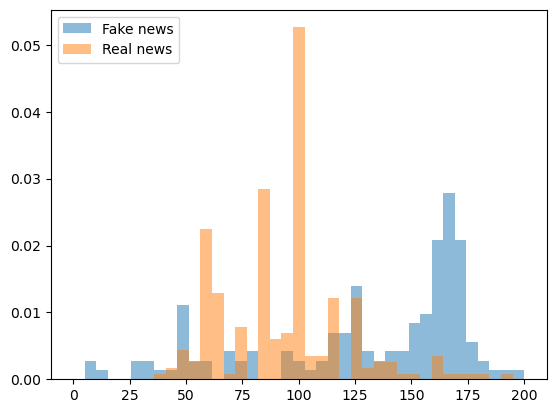

In [31]:
bins = np.linspace(0, 200, 40)

pyplot.hist(data[data['label']=='FAKE']['body_len'], bins, alpha=0.5, density=True, label='Fake news')
pyplot.hist(data[data['label']=='REAL']['body_len'], bins, alpha=0.5, density=True, label='Real news')
pyplot.legend(loc='upper left')
pyplot.show()